In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks, peak_prominences
import os
import analysis_lag as ana

In [2]:
er = ana.ReadData(directory='./Adenosine Oscillation/2021_02_04_Ado40s_dish2_1_ER.csv')
cy = ana.ReadData(directory='./Adenosine Oscillation/2021_02_04_Ado40s_dish2_1_CY.csv')

In [3]:
# hier das warum beschreiben. Wo kommen die Zahlen her?
time_both = np.arange(0.859,400*0.859,0.859)

0


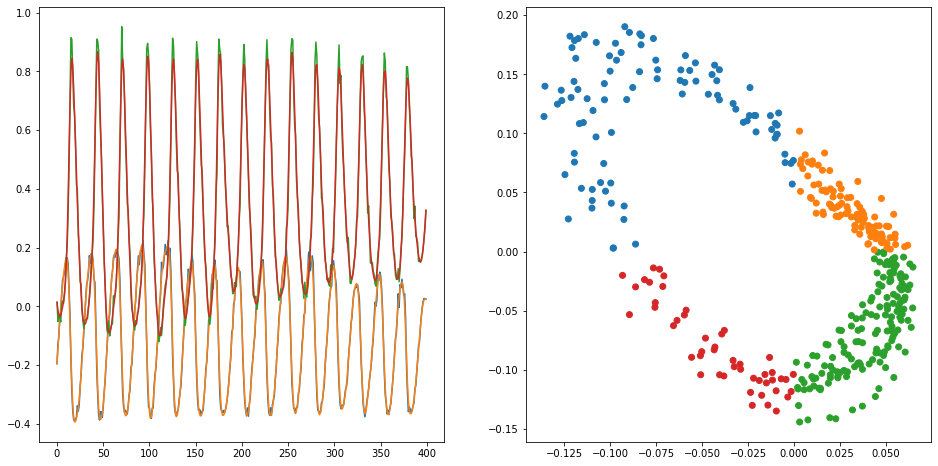

1


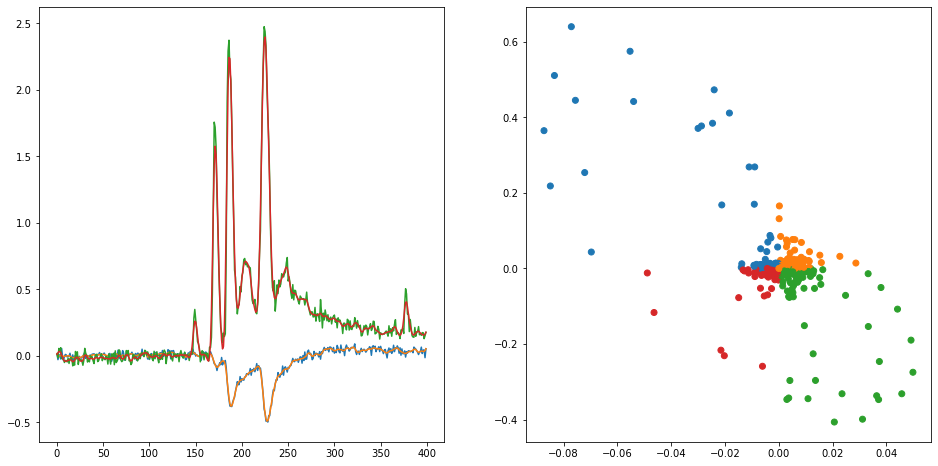

2


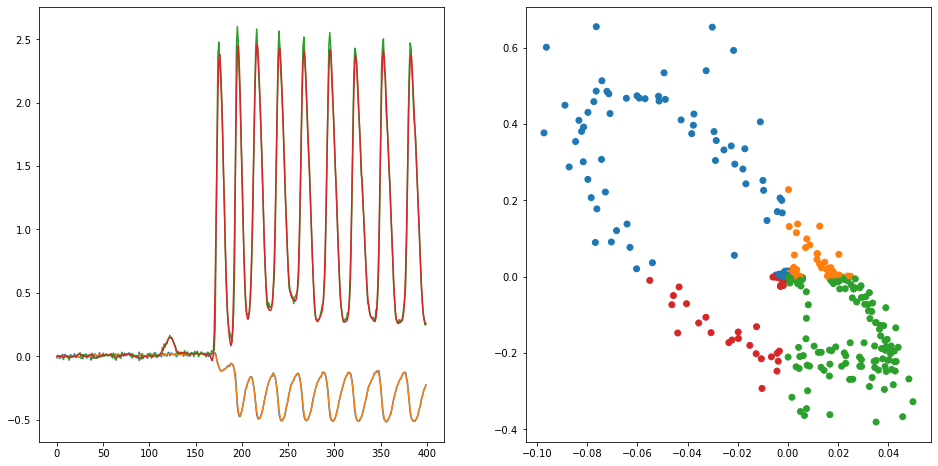

3


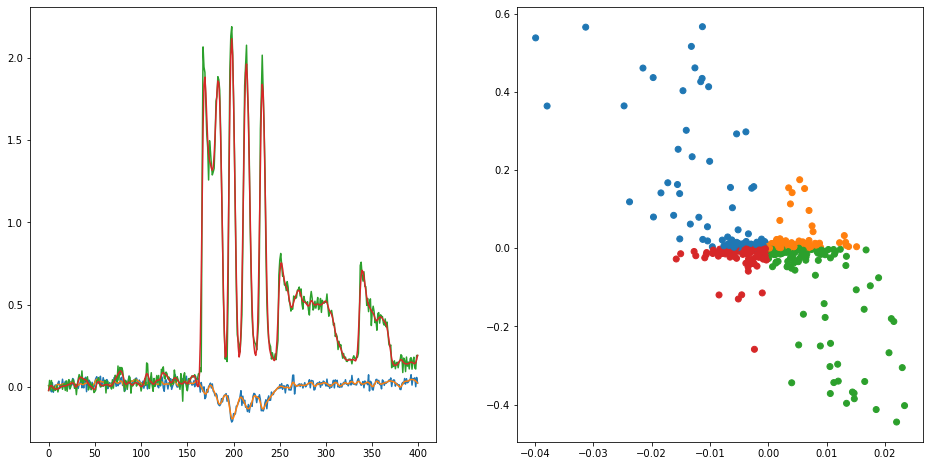

4


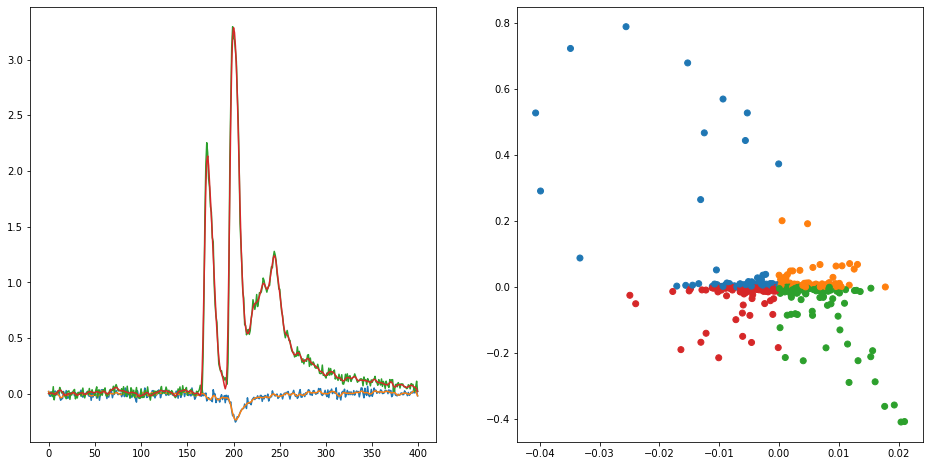

5


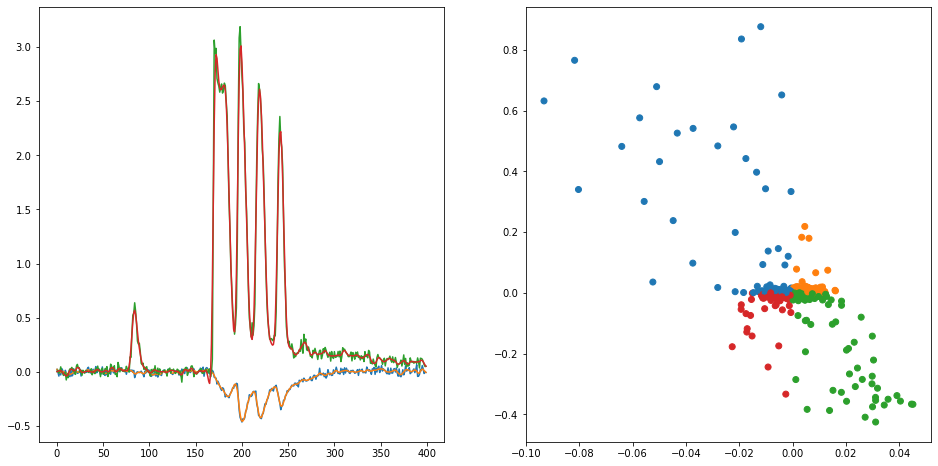

6


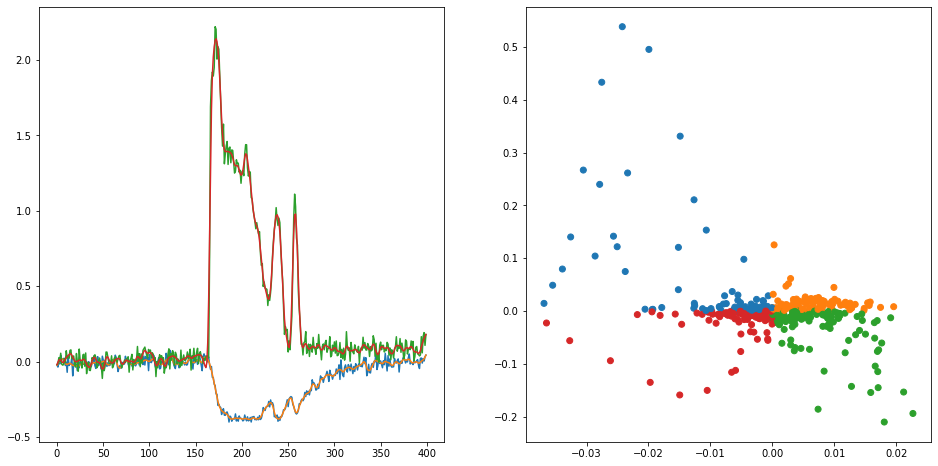

7


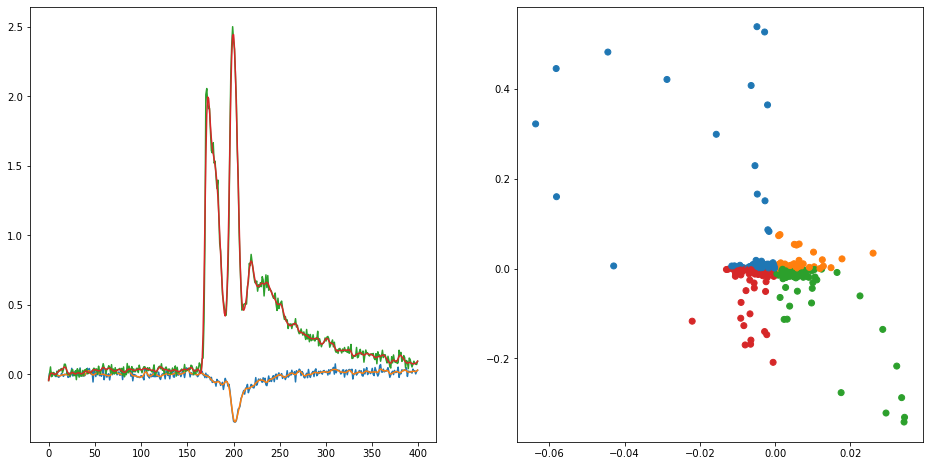

8


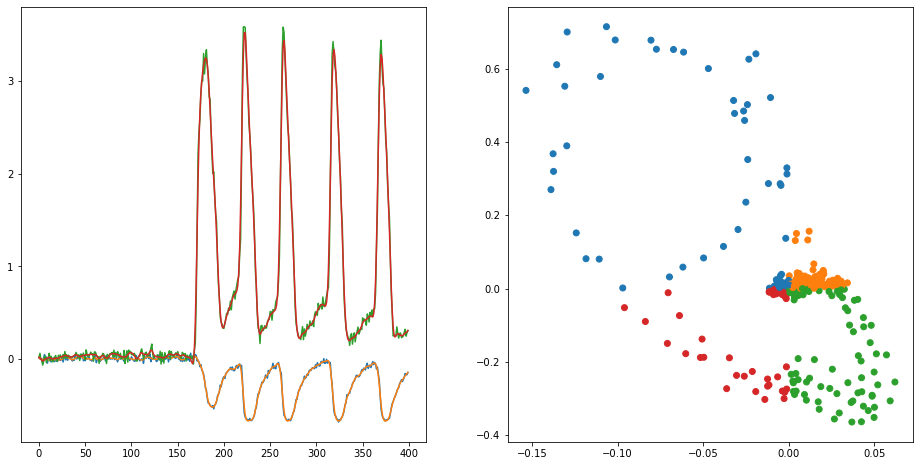

9


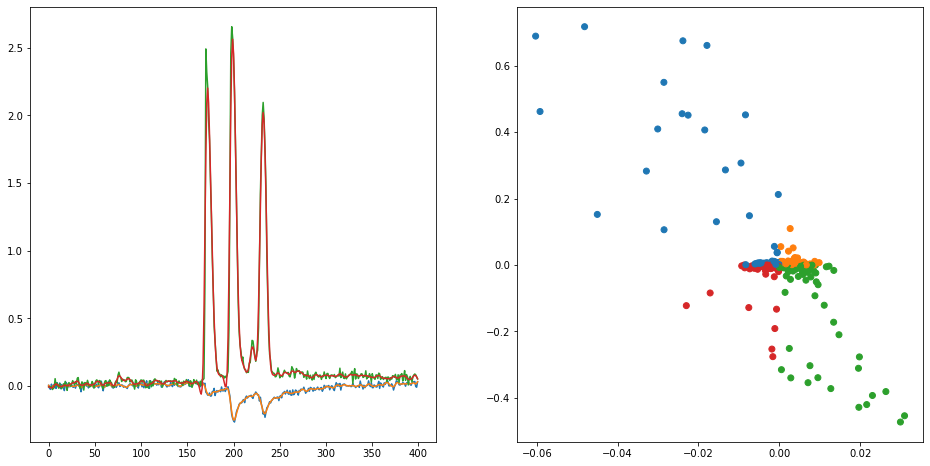

10


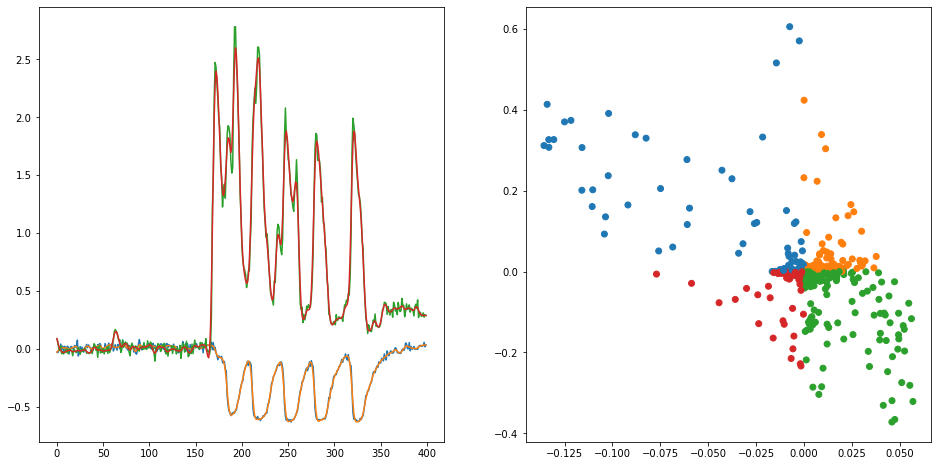

11


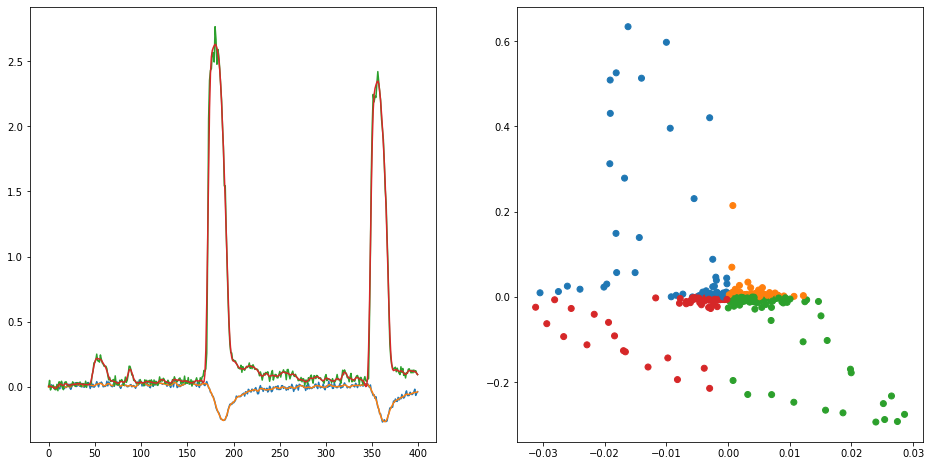

12


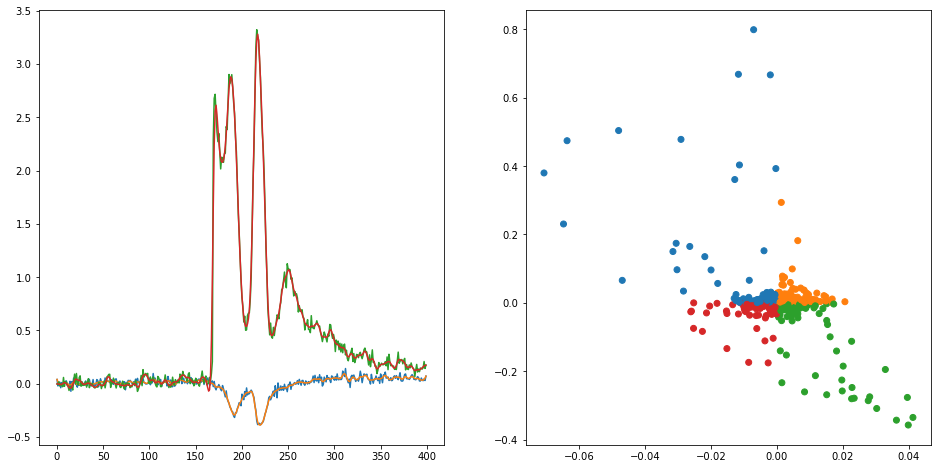

13


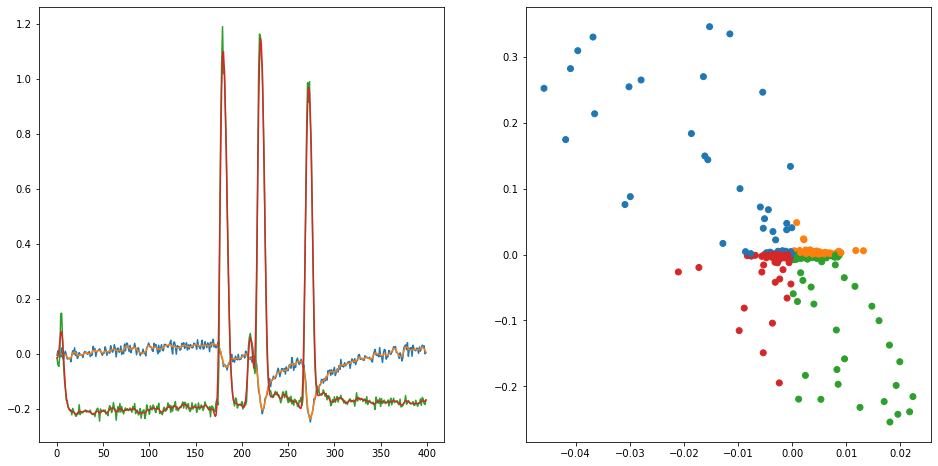

In [4]:
# 0.859 seconds per frame
fps=0.859

# each column is one cell
for cell in range(len(er.data_norm.columns)):
    # load and process the er signal data
    er_signal = er.data_norm.iloc[:,cell].values
    filtering = ana.LowpassFilter(fps)
    er_lowpass = filtering.apply(er_signal)
    
    # load and process the cytosol signal data
    # reuse the same filter.
    cy_signal = cy.data_norm.iloc[:,cell].values
    cy_lowpass = filtering.apply(cy_signal)
    
    # calculate the derivative of the signals
    er_diff = np.diff(er_lowpass)/np.diff(time_both)
    cy_diff = np.diff(cy_lowpass)/np.diff(time_both)
    
    # do funny plotty thingys
    col = np.where((cy_diff>0)&(er_diff>0),'C1',np.where((cy_diff<0)&(er_diff<0),'C3',np.where((cy_diff>0)&(er_diff<0),'C0','C2')))
    print(cell)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
    ax1.plot(er_signal)
    ax1.plot(er_lowpass)
    ax1.plot(cy_signal)
    ax1.plot(cy_lowpass)
    #ax2.scatter(er_lowpass, cy_lowpass)
    ax2.scatter(er_diff, cy_diff, c=col)
    plt.show()

In [5]:
er_signal = er.data_norm.iloc[0:90,0].values
filtering = ana.LowpassFilter(fps)
er_lowpass = filtering.apply(er_signal)

cy_signal = cy.data_norm.iloc[0:90,0].values
cy_lowpass = filtering.apply(cy_signal)

er_diff = np.diff(er_lowpass)/np.diff(time_both[0:90])
cy_diff = np.diff(cy_lowpass)/np.diff(time_both[0:90])

#'#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
col = col = np.where((cy_diff>0)&(er_diff>0),'C1',np.where((cy_diff<0)&(er_diff<0),'C3',np.where((cy_diff>0)&(er_diff<0),'C0','C2')))

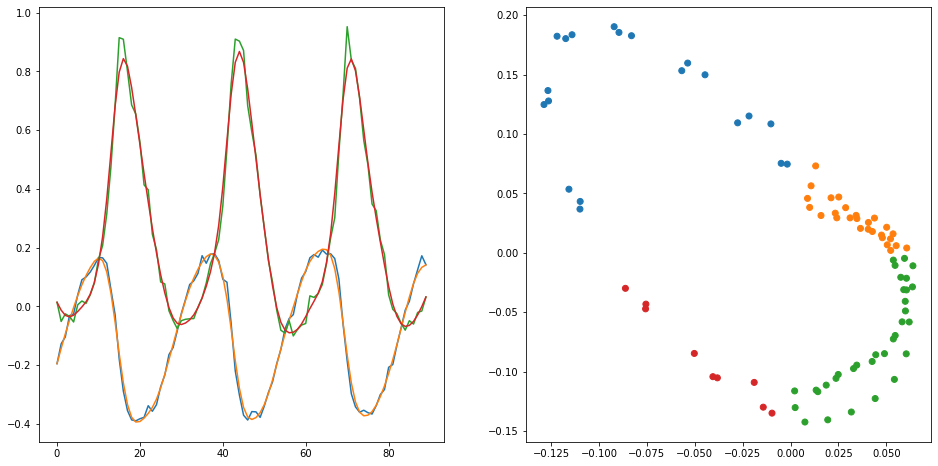

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.plot(er_signal)
ax1.plot(er_lowpass)
ax1.plot(cy_signal)
ax1.plot(cy_lowpass)
#ax2.scatter(er_lowpass, cy_lowpass)
ax2.scatter(er_diff, cy_diff, c=col)
plt.show()

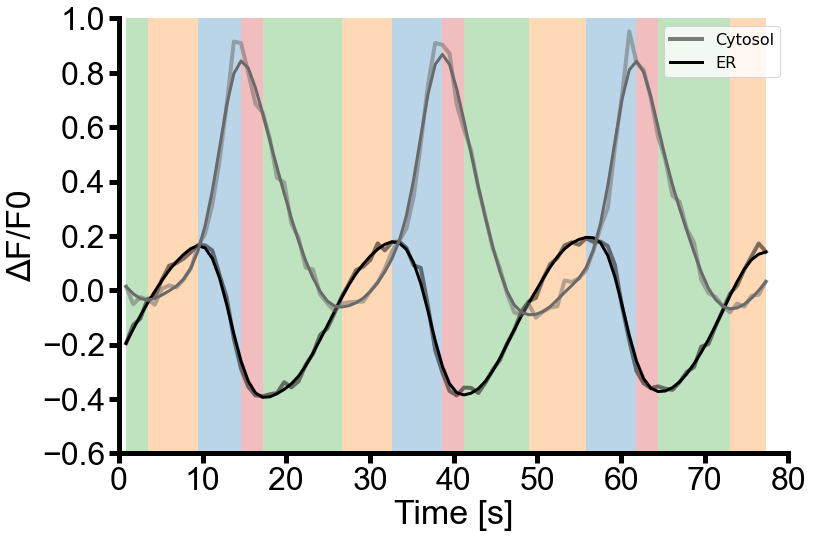

In [7]:
plt.figure(figsize=(12,8))
#plt.plot(time, CYnorm, linewidth=4)
plt.plot(time_both[0:90], er_signal, linewidth=4, c='k', alpha=0.5)
plt.plot(time_both[0:90], er_lowpass, linewidth=3, c='k')


plt.plot(time_both[0:90], cy_signal, linewidth=4, c='dimgray', alpha=0.5)
plt.plot(time_both[0:90], cy_lowpass, linewidth=3, c='dimgray')
#plt.plot(time_CY, CY_average, linewidth=4)

for i,color in enumerate(col):
    plt.axvspan(time_both[i],time_both[i+1],facecolor=color, alpha=0.3)
#for i in np.arange(0, 80, 2):
    #plt.axvspan(i,i+0.5,color='white')

ax = plt.gca()
ax.set_xlim([0, 80])
ax.set_ylim([-0.6, 1])
ax.tick_params(length=6, width=4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('Time [s]', fontsize=34, fontname='Arial')
plt.ylabel('\u0394F/F0', fontsize=34,fontname='Arial')
plt.legend(['Cytosol','ER'], fontsize=16)

#plt.savefig('oscillation_parts.png', bbox_inches = "tight")


plt.show()

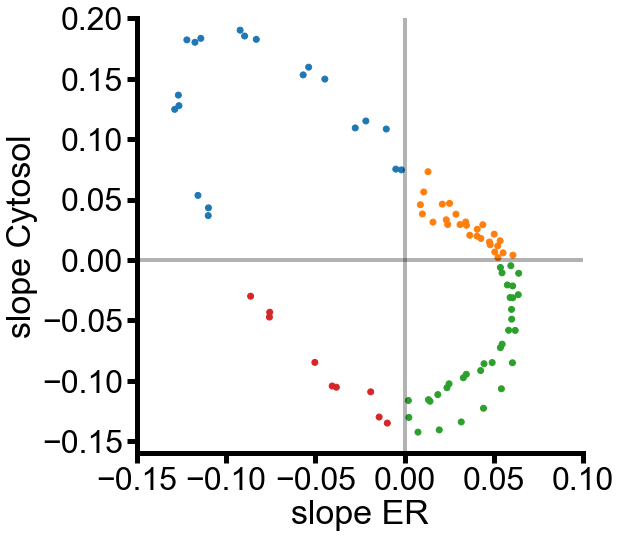

In [8]:
plt.figure(figsize=(8,8))
#plt.plot(time, CYnorm, linewidth=4)
plt.scatter(er_diff, cy_diff, c=col)
#plt.plot(time_CY, CY_average, linewidth=4)

plt.axhline(0,c='k', linewidth=4, alpha=0.3) #, linestyle='--'
plt.axvline(0,c='k', linewidth=4, alpha=0.3)
#for i,color in enumerate(col):
    #plt.axvspan(time_both[i],time_both[i+1],facecolor=color, alpha=0.6)

ax = plt.gca()
ax.set_xlim([-0.15, 0.1])
ax.set_ylim([-0.16, 0.2])
ax.tick_params(length=6, width=4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('slope ER', fontsize=34, fontname='Arial')
plt.ylabel('slope Cytosol', fontsize=34,fontname='Arial')

#plt.savefig('oscillation_slope.png', bbox_inches = "tight")


plt.show()

ValueError: 'c' argument has 89 elements, which is inconsistent with 'x' and 'y' with size 90.

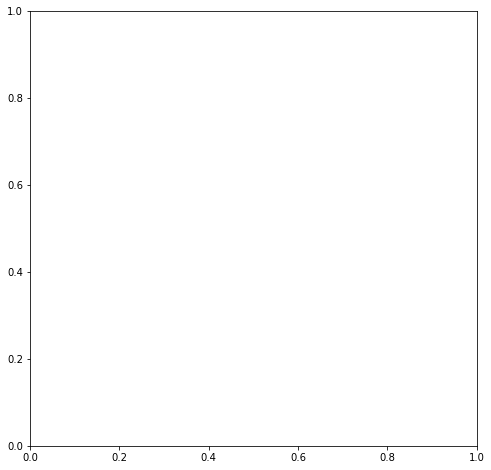

In [9]:
plt.figure(figsize=(8,8))
#plt.plot(time, CYnorm, linewidth=4)
plt.scatter(er_lowpass, cy_lowpass, c=col)
#plt.plot(time_CY, CY_average, linewidth=4)

plt.axhline(0,c='k', linewidth=4, alpha=0.3) #, linestyle='--'
plt.axvline(0,c='k', linewidth=4, alpha=0.3)
#for i,color in enumerate(col):
    #plt.axvspan(time_both[i],time_both[i+1],facecolor=color, alpha=0.6)

ax = plt.gca()
ax.set_xlim([-0.45, 0.3])
ax.set_ylim([-0.15, 1])
ax.tick_params(length=6, width=4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('\u0394F/F0 ER', fontsize=34, fontname='Arial')
plt.ylabel('\u0394F/F0 Cytosol', fontsize=34,fontname='Arial')

#plt.savefig('oscillation_scatter.png', bbox_inches = "tight")


plt.show()

In [10]:
def lagging(er, cytosol, time, peak=True): 
    if peak == True:        
        peaks_er = find_peaks(-er, prominence=0.01)
        peaks_cy = find_peaks(cytosol, prominence=0.05)
    
    else:
        peaks_er = find_peaks(er, prominence=0.01)
        peaks_cy = find_peaks(-cytosol, prominence=0.01)     

    # 0 == p Waves
    end_positions = peaks_er[0]

    # 1 == QRS Complex
    start_positions = peaks_cy[0]
    

    last_index = 0
    matches = []

    last_index = 0
    for end in end_positions:
        # find closest match
        # we want the largest smaller value
        candidates = start_positions[last_index::][start_positions[last_index::] < end]

        if len(candidates):
            start = candidates.argmax()

            matches.append([start_positions[last_index + start], end])
            last_index += start +1

    matches = np.array(matches)
    diffs = matches[:, 1] - matches[:, 0]
    lag = time[matches[:,1]]-time[matches[:,0]]
    
    return matches,lag

In [11]:
er_signal = er.data_norm.iloc[:,0].values
filtering = ana.LowpassFilter(fps)
er_lowpass = filtering.apply(er_signal)

cy_signal = cy.data_norm.iloc[:,0].values
cy_lowpass = filtering.apply(cy_signal)

er_diff = np.diff(er_lowpass)/np.diff(time_both)
cy_diff = np.diff(cy_lowpass)/np.diff(time_both)

inflection:  [0.859 1.718 1.718 0.859 1.718 0.859 1.718 1.718 1.718 0.859 0.859 1.718
 1.718 1.718 1.718]
peaks:  [2.577 2.577 2.577 2.577 2.577 2.577 3.436 3.436 2.577 3.436 2.577 2.577
 2.577 2.577 2.577]
peaks_pre:  [6.013 6.013 6.872 6.872 7.731 6.013 4.295 4.295 5.154 5.154 4.295 4.295
 4.295 4.295 4.295]
inflection2:  [7.731 5.154 6.872 7.731 6.872 6.872 8.59  6.872 6.872 6.013 6.872 6.872
 6.872 6.872 6.872]


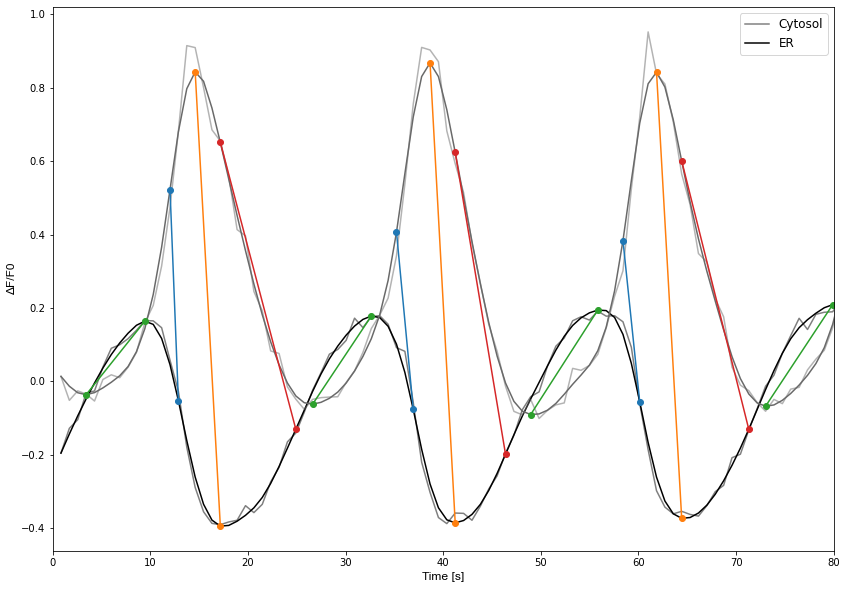

In [12]:
plt.figure(figsize=(14,10))
plt.plot(time_both, er_signal, c='k', alpha=0.5)
plt.plot(time_both, er_lowpass, c='k')


plt.plot(time_both, cy_signal, c='dimgray', alpha=0.5)
plt.plot(time_both, cy_lowpass, c='dimgray')

ax = plt.gca()
ax.set_xlim([0, 80])

#inflection point
matches,lag = lagging(er_diff, cy_diff, time_both)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C0')
print('inflection: ',lag)


#peaks
matches,lag = lagging(er_lowpass, cy_lowpass, time_both)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C1')
print('peaks: ',lag)


#peaks_pre
matches,lag = lagging(er_lowpass, cy_lowpass, time_both, peak=False)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C2')
print('peaks_pre: ',lag)

#infelction back
matches,lag = lagging(er_diff, cy_diff, time_both, peak=False)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C3')
print('inflection2: ',lag)

plt.legend(labels = ['Cytosol','ER'],fontsize=12)
plt.xlabel('Time [s]', fontsize=12, fontname='Arial')
plt.ylabel('\u0394F/F0', fontsize=12,fontname='Arial') 
#plt.xlim([120,150])
plt.show()